In [2]:
pip install igraph

You should consider upgrading via the 'd:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
from igraph import *
import pandas as pd
import numpy as np
from collections import Counter
import itertools


In [4]:
data_ = pd.read_csv("D:\Zoom_HK3_2021\Graph mining\Final Seminar\primaryschool.csv")

Source = list(data_['Source'].unique())
Target = list(data_['Target'].unique())

data = data_.groupby("Source")["Target"].apply(list).to_dict()

In [5]:
Components = dict()
Num_Components = 1
Component = []
Component.append(data_.iloc[0,0])
Component.append(data_.iloc[0,1])

for node in range(len(data_)) :
    if data_.iloc[node,0] in Component or  data_.iloc[node,1] in Component :
         Component.append(data_.iloc[node,0])
         Component.append(data_.iloc[node,1])
    else :
        Components[Num_Components] = list(set(Component))
        Component= []
        Component.append(data_.iloc[node,0])
        Component.append(data_.iloc[node,1])
        Num_Components+=1
    if node == len(data_) - 1:
         Components[Num_Components] = list(set(Component))
Components

{1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 2: [16, 13, 14, 15]}

In [6]:
Vertex_ = list(itertools.chain(Source, Target)) 

In [7]:
Vertex_ = list(set(Vertex_))

In [8]:
graph = Graph().community_multilevel()


In [9]:
graph = Graph(edges= [(v, a) for v in data.keys() for a in data[v]])

In [15]:
data

{1: [2, 3, 4],
 2: [5, 6, 7],
 3: [6, 7],
 4: [5, 7, 8],
 5: [6, 9],
 6: [7, 9, 10],
 7: [9, 10],
 8: [10],
 9: [10, 11],
 10: [12],
 11: [12],
 13: [15, 14, 16]}

In [11]:
Vertex_ = graph.get_vertex_dataframe()

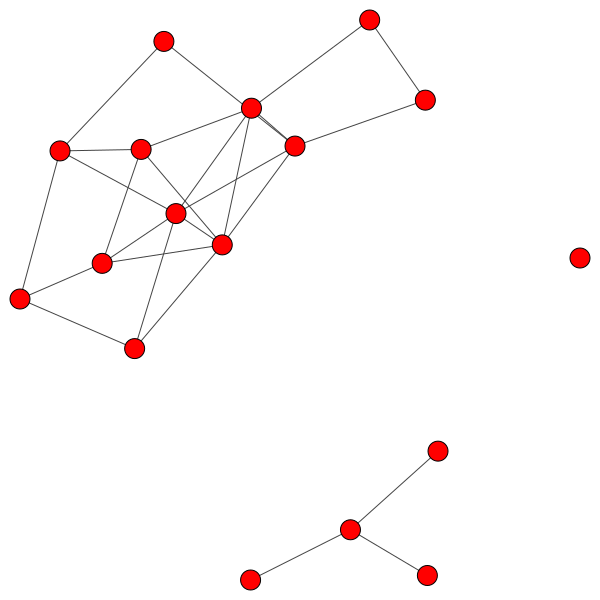

In [12]:
plot(graph,mark_groups = True)

In [18]:
def CheckHaveParent(PNSubgraph):
   
   lengthPN = len(PNSubGraph)
   for i in range(lengthPN):
         
        if PNSubGraph[i]  > 0 :
              return True 
   return False                   
len_column = 17
visited = []
queue = []
Level = [0] * len_column
PN = dict((el,[]) for el in list(range(1,len_column)))
Size = []
threshPN = 2
Distance = []

def PNSubGraph(visited, graph, node):
  visited.append(node)
  queue.append(node)
  
  PN[node] = [element *-1 for element in data[node][0:threshPN]]
  Level[node] = 0 
  while queue:
    s = queue.pop(0) 
    print (s, end = " ") 
    
    if s not in list(data.keys()) : 
        break
    len_pn = len(PN[s])
    if  len_pn < 2 : 
       for i in data[s][0:threshPN-len_pn] :
            PN[s].append(-1*i)
    for neighbour in data[s]:
       if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
        
        #Distance_Path_To_Root = Level[s] + Distance[s][neighbour]
        #Have_Parent = CheckHaveParent(PN[neighbour])
        # if  Have_Parent : 
        #     Level[neighbour] = Distance_Path_To_Root
        # else :
        #     Level[neighbour] = -Distance_Path_To_Root 

       if len(PN[neighbour]) < threshPN : 
           PN[neighbour].append(s)


PNSubGraph(visited, data, 1)

1 2 3 4 5 6 7 8 9 10 11 12 

In [19]:
PN

{1: [-2, -3],
 2: [1, -5],
 3: [1, -6],
 4: [1, -5],
 5: [2, 4],
 6: [2, 3],
 7: [2, 3],
 8: [4, -10],
 9: [5, 6],
 10: [6, 7],
 11: [9, -12],
 12: [10, 11],
 13: [],
 14: [],
 15: [],
 16: []}